In [37]:
#With all features

In [38]:
# Import libraries
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [39]:
#load the CSV data file in pandas frame
#df = pd.read_csv(r'C:\Users\keswa\OneDrive - Universiti Teknikal Malaysia Melaka\UTEM\BITU 3973 (FYP)\Data-Biochar-Yield.csv', index_col = 'Unnamed: 0')

# Try reading the CSV file with a different encoding
file_path = r'C:\Users\keswa\OneDrive - Universiti Teknikal Malaysia Melaka\UTEM\BITU 3973 (FYP)\Data-Biochar-Yield.csv'
try:
    df = pd.read_csv(file_path, index_col='Unnamed: 0', encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, index_col='Unnamed: 0', encoding='iso-8859-1')

print(df.head())

   Fixed carbon  Volatile matter       Ash      C     H      O     N  \
0     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   
1     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   
2     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   
3     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   
4     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   

   Residence time (min)  Temperature (°C)  Heating rate (°C/min)  \
0                    30               400                     15   
1                    60               400                     10   
2                    90               400                      5   
3                    30               500                     15   
4                    60               500                     10   

   Biochar yield (%)  
0              30.80  
1              26.60  
2              26.77  
3              23.57  
4              25.32  


In [40]:
# Data pre-processing
# Input the feedstock variable
features_values = [
    'Fixed carbon',
    'Volatile matter',
    'Ash',
    'C',
    'H',
    'O',
    'N',
    'Residence time (min)',
    'Temperature (°C)',
    'Heating rate (°C/min)',
]

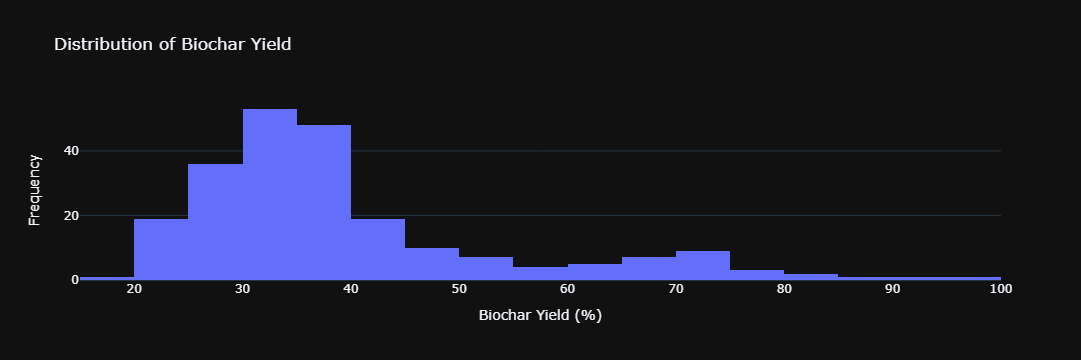

In [41]:
fig = px.histogram(
    df, 
    x='Biochar yield (%)', 
    histfunc='count', 
    template='plotly_dark', 
    title='Distribution of Biochar Yield',
    labels={'Biochar yield (%)': 'Biochar Yield (%)'},  # Renaming x-axis label
)

fig.update_layout(
    xaxis_title='Biochar Yield (%)',
    yaxis_title='Frequency'
)

fig.show()

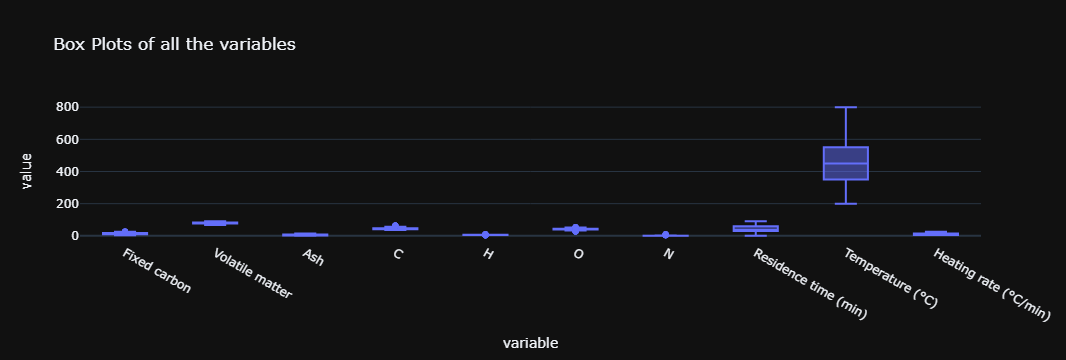

In [42]:
#Visualisation of all the variables (WWTP) 
fig = px.box(df, y=df.drop(['Biochar yield (%)'], axis=1).columns, template='plotly_dark', title='Box Plots of all the variables')
fig.show()

In [43]:
# Define a function to convert continuous target variable to categorical for classification
def classify_target(y):
    return pd.qcut(y, q=3, labels=['Low', 'Medium', 'High'])

In [44]:
#'Temperature (°C)'
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['Biochar yield (%)'], axis=1))
X_scaled_df = pd.DataFrame(X_scaled, columns=df.drop(['Biochar yield (%)'], axis=1).columns)

print(X_scaled_df.head())

   Fixed carbon  Volatile matter       Ash        C         H        O  \
0       0.77843        -0.228527 -0.773912  0.72454  0.547071  0.17986   
1       0.77843        -0.228527 -0.773912  0.72454  0.547071  0.17986   
2       0.77843        -0.228527 -0.773912  0.72454  0.547071  0.17986   
3       0.77843        -0.228527 -0.773912  0.72454  0.547071  0.17986   
4       0.77843        -0.228527 -0.773912  0.72454  0.547071  0.17986   

          N  Residence time (min)  Temperature (°C)  Heating rate (°C/min)  
0  0.358599             -0.431791         -0.487082               0.639514  
1  0.358599              1.170587         -0.487082              -0.241767  
2  0.358599              2.772966         -0.487082              -1.123048  
3  0.358599             -0.431791          0.315839               0.639514  
4  0.358599              1.170587          0.315839              -0.241767  


In [45]:
# Apply the function to each target variable
y_bio_class = classify_target(df['Biochar yield (%)'])

# Split the dataset into training and testing subsets for Biochar Yield
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_bio_class, test_size=0.2, random_state=20)


In [46]:
# Random Forest Classifier model for Biochar Yield (%)
classifier_bio = RandomForestClassifier(random_state=20)
classifier_bio.fit(X_train, y_train)
y_pred_bio = classifier_bio.predict(X_test)

In [47]:
# Evaluate the model
accuracy_bio = accuracy_score(y_test, y_pred_bio)
classification_report_bio = classification_report(y_test, y_pred_bio)

print("Accuracy Biology Yield (%)):", accuracy_bio)
print("\nClassification Report (Biology Yield (%)):")
print(classification_report_bio)

Accuracy Biology Yield (%)): 0.8478260869565217

Classification Report (Biology Yield (%)):
              precision    recall  f1-score   support

        High       0.83      0.77      0.80        13
         Low       0.89      1.00      0.94        16
      Medium       0.81      0.76      0.79        17

    accuracy                           0.85        46
   macro avg       0.84      0.84      0.84        46
weighted avg       0.84      0.85      0.84        46



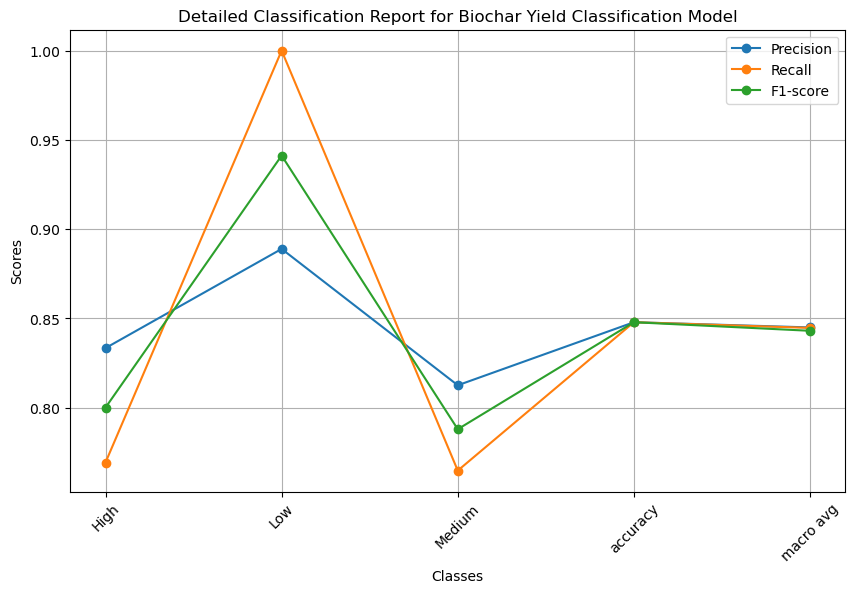

In [48]:
# Convert the classification report to a DataFrame
report_df = pd.DataFrame(classification_report(y_test, y_pred_bio, output_dict=True)).T

# Plotting Precision, Recall, and F1-score for each class
plt.figure(figsize=(10, 6))
plt.plot(report_df.index[:-1], report_df['precision'][:-1], marker='o', label='Precision')
plt.plot(report_df.index[:-1], report_df['recall'][:-1], marker='o', label='Recall')
plt.plot(report_df.index[:-1], report_df['f1-score'][:-1], marker='o', label='F1-score')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Detailed Classification Report for Biochar Yield Classification Model')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


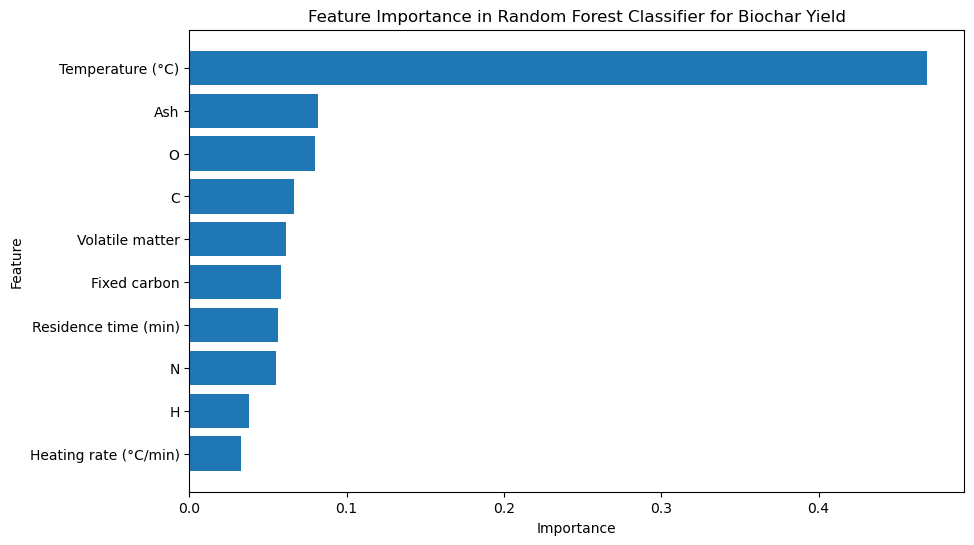

In [49]:
# using random forest classifier technique
# Calculate feature importances
importances = classifier_bio.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_scaled_df.columns,
    'Importance': importances
})

# Sort the DataFrame by importance scores
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Classifier for Biochar Yield')
plt.show()

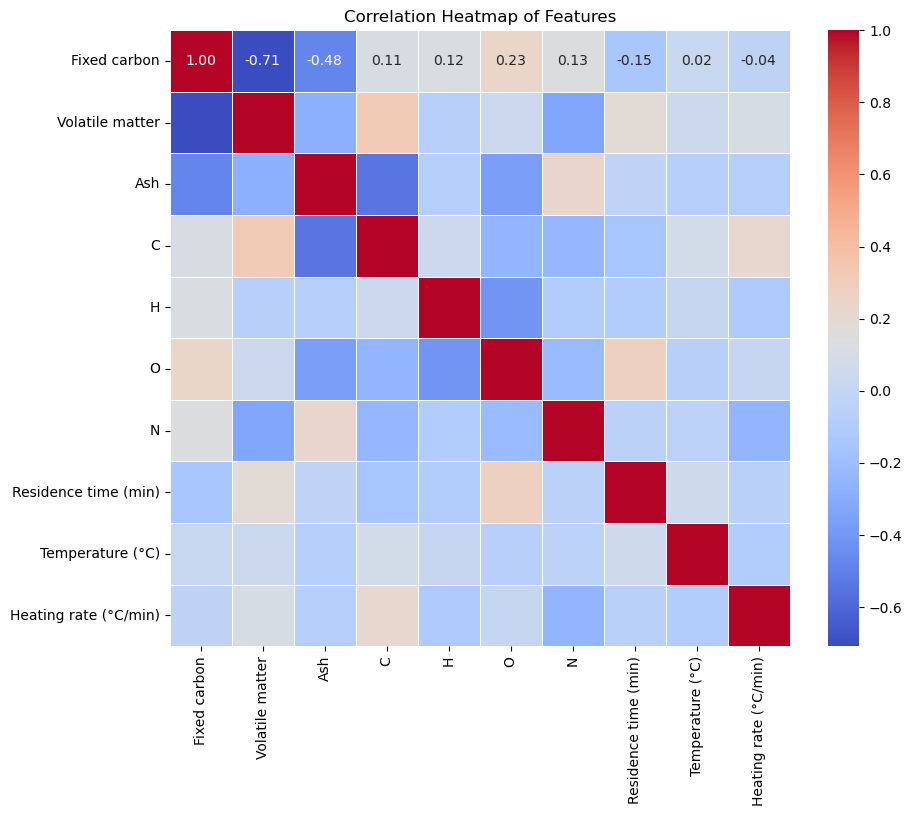

In [50]:
# Calculate the correlation matrix
correlation_matrix = X_scaled_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [51]:
#Without 'H', 'N', 'Residence time (min)', 'Heating rate (°C/min)'

   Fixed carbon  Volatile matter       Ash      C     H      O     N  \
0     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   
1     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   
2     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   
3     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   
4     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   

   Residence time (min)  Temperature (°C)  Heating rate (°C/min)  \
0                    30               400                     15   
1                    60               400                     10   
2                    90               400                      5   
3                    30               500                     15   
4                    60               500                     10   

   Biochar yield (%)  
0              30.80  
1              26.60  
2              26.77  
3              23.57  
4              25.32  


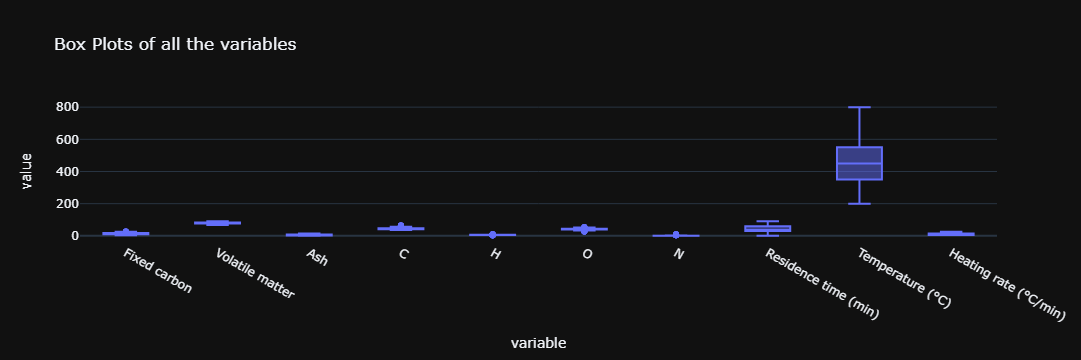

   Fixed carbon  Volatile matter       Ash        C        O  Temperature (°C)
0       0.77843        -0.228527 -0.773912  0.72454  0.17986         -0.487082
1       0.77843        -0.228527 -0.773912  0.72454  0.17986         -0.487082
2       0.77843        -0.228527 -0.773912  0.72454  0.17986         -0.487082
3       0.77843        -0.228527 -0.773912  0.72454  0.17986          0.315839
4       0.77843        -0.228527 -0.773912  0.72454  0.17986          0.315839
Accuracy Biochar Yield (%)): 0.8478260869565217

Classification Report (Biochar Yield (%)):
              precision    recall  f1-score   support

        High       0.83      0.77      0.80        13
         Low       0.89      1.00      0.94        16
      Medium       0.81      0.76      0.79        17

    accuracy                           0.85        46
   macro avg       0.84      0.84      0.84        46
weighted avg       0.84      0.85      0.84        46



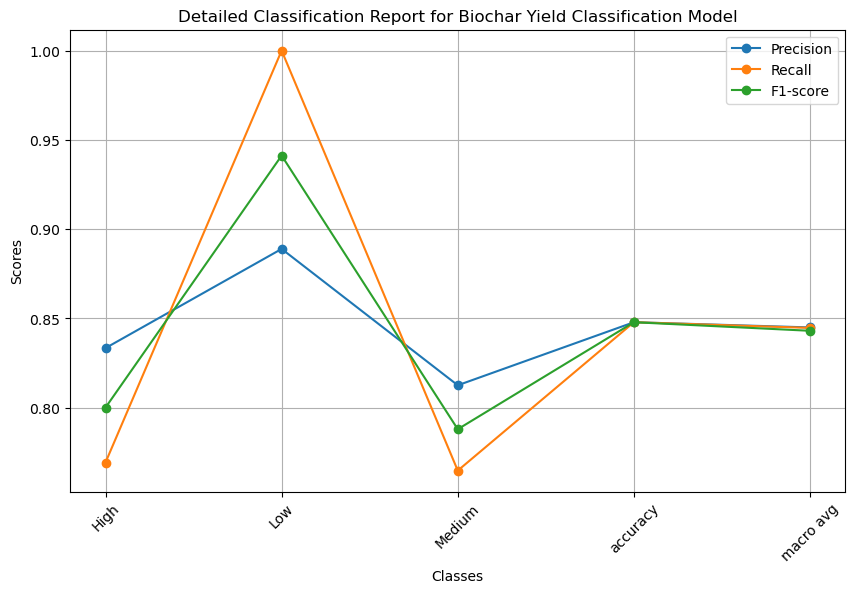

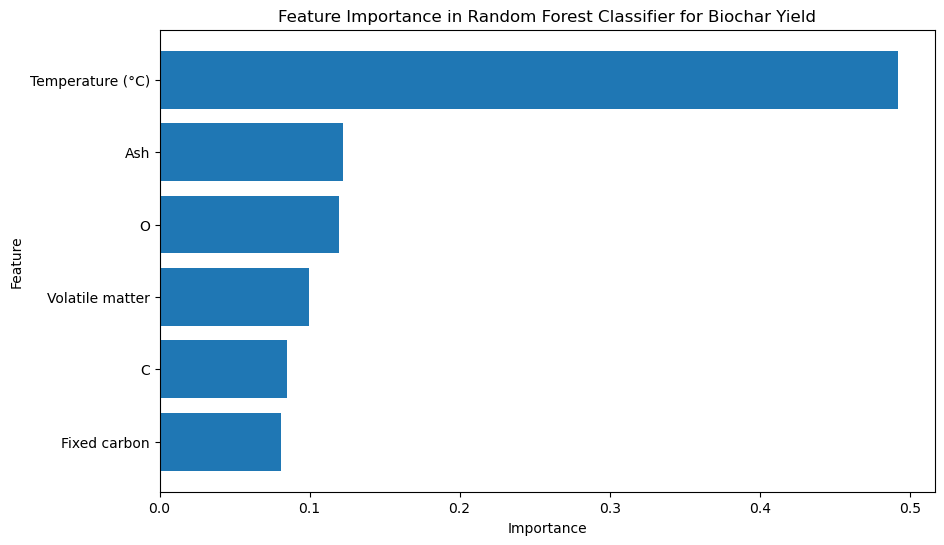

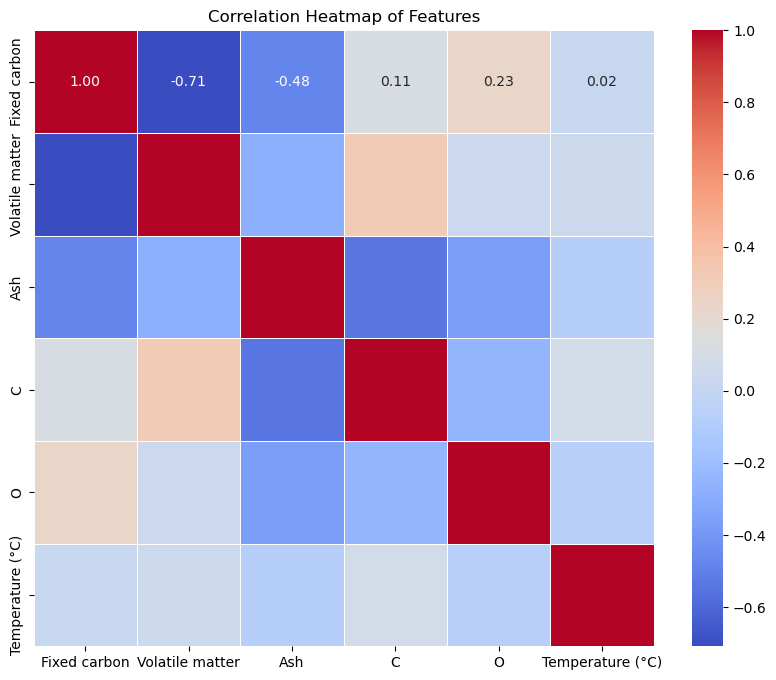

In [52]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the CSV data file into a pandas DataFrame
file_path = r'C:\Users\keswa\OneDrive - Universiti Teknikal Malaysia Melaka\UTEM\BITU 3973 (FYP)\Data-Biochar-Yield.csv'
try:
    df = pd.read_csv(file_path, index_col='Unnamed: 0', encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, index_col='Unnamed: 0', encoding='iso-8859-1')

print(df.head())

# Visualisation of all the variables (WWTP) 
fig = px.box(df, y=df.drop(['Biochar yield (%)'], axis=1).columns, template='plotly_dark', title='Box Plots of all the variables')
fig.show()

# Define a function to convert continuous target variable to categorical for classification
def classify_target(y):
    return pd.qcut(y, q=3, labels=['Low', 'Medium', 'High'])

# Normalize the features
columns_to_drop = ['Biochar yield (%)', 'H', 'N', 'Residence time (min)', 'Heating rate (°C/min)']
X = df.drop(columns_to_drop, axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.head())

# Apply the function to each target variable
y_bio_class = classify_target(df['Biochar yield (%)'])

# Split the dataset into training and testing subsets for Biochar Yield
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_bio_class, test_size=0.2, random_state=20)

# Random Forest Classifier model for Biochar Yield (%)
classifier_bio = RandomForestClassifier(random_state=20)
classifier_bio.fit(X_train, y_train)
y_pred_bio = classifier_bio.predict(X_test)

# Evaluate the model
accuracy_bio = accuracy_score(y_test, y_pred_bio)
classification_report_bio = classification_report(y_test, y_pred_bio)

print("Accuracy Biochar Yield (%)):", accuracy_bio)
print("\nClassification Report (Biochar Yield (%)):")
print(classification_report_bio)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(classification_report(y_test, y_pred_bio, output_dict=True)).T

# Plotting Precision, Recall, and F1-score for each class
plt.figure(figsize=(10, 6))
plt.plot(report_df.index[:-1], report_df['precision'][:-1], marker='o', label='Precision')
plt.plot(report_df.index[:-1], report_df['recall'][:-1], marker='o', label='Recall')
plt.plot(report_df.index[:-1], report_df['f1-score'][:-1], marker='o', label='F1-score')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Detailed Classification Report for Biochar Yield Classification Model')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Calculate feature importances
importances = classifier_bio.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_scaled_df.columns,
    'Importance': importances
})

# Sort the DataFrame by importance scores
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Classifier for Biochar Yield')
plt.show()


# Calculate the correlation matrix
correlation_matrix = X_scaled_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


In [53]:
# Without 'Temperature (°C)'

   Fixed carbon  Volatile matter       Ash      C     H      O     N  \
0     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   
1     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   
2     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   
3     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   
4     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   

   Residence time (min)  Temperature (°C)  Heating rate (°C/min)  \
0                    30               400                     15   
1                    60               400                     10   
2                    90               400                      5   
3                    30               500                     15   
4                    60               500                     10   

   Biochar yield (%)  
0              30.80  
1              26.60  
2              26.77  
3              23.57  
4              25.32  


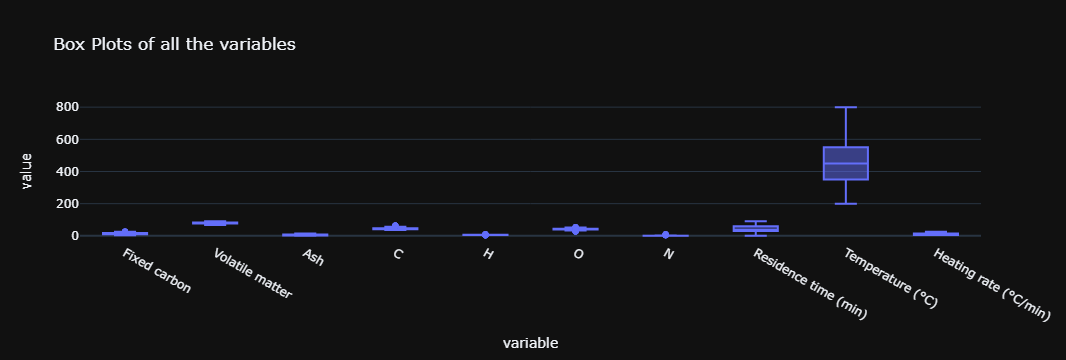

   Fixed carbon  Volatile matter       Ash        C         H        O  \
0       0.77843        -0.228527 -0.773912  0.72454  0.547071  0.17986   
1       0.77843        -0.228527 -0.773912  0.72454  0.547071  0.17986   
2       0.77843        -0.228527 -0.773912  0.72454  0.547071  0.17986   
3       0.77843        -0.228527 -0.773912  0.72454  0.547071  0.17986   
4       0.77843        -0.228527 -0.773912  0.72454  0.547071  0.17986   

          N  Residence time (min)  Heating rate (°C/min)  
0  0.358599             -0.431791               0.639514  
1  0.358599              1.170587              -0.241767  
2  0.358599              2.772966              -1.123048  
3  0.358599             -0.431791               0.639514  
4  0.358599              1.170587              -0.241767  
Accuracy Biochar Yield (%)): 0.5652173913043478

Classification Report (Biochar Yield (%)):
              precision    recall  f1-score   support

        High       0.42      0.62      0.50        13


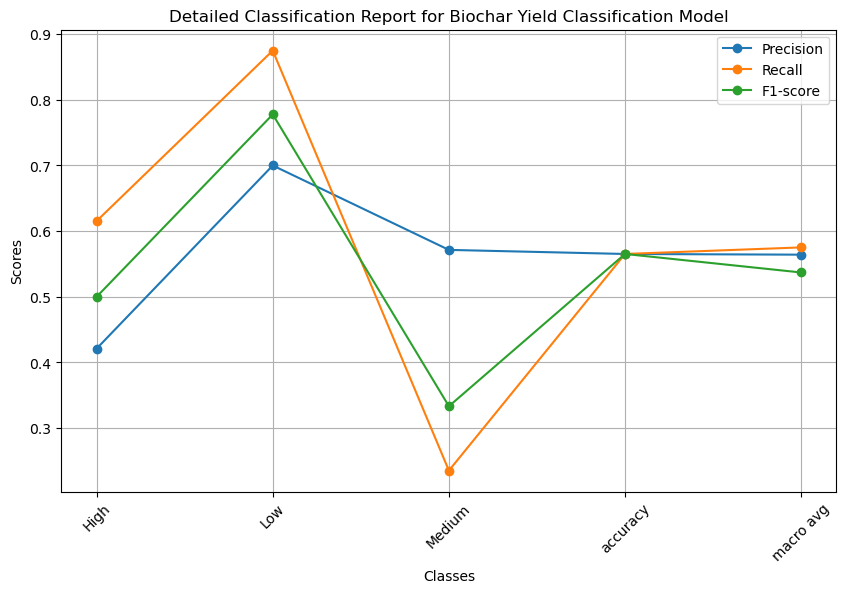

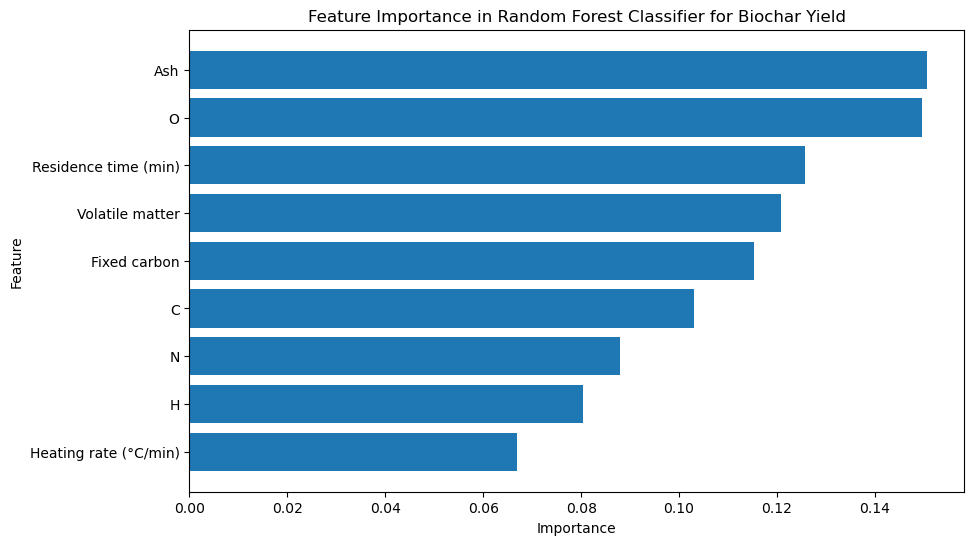

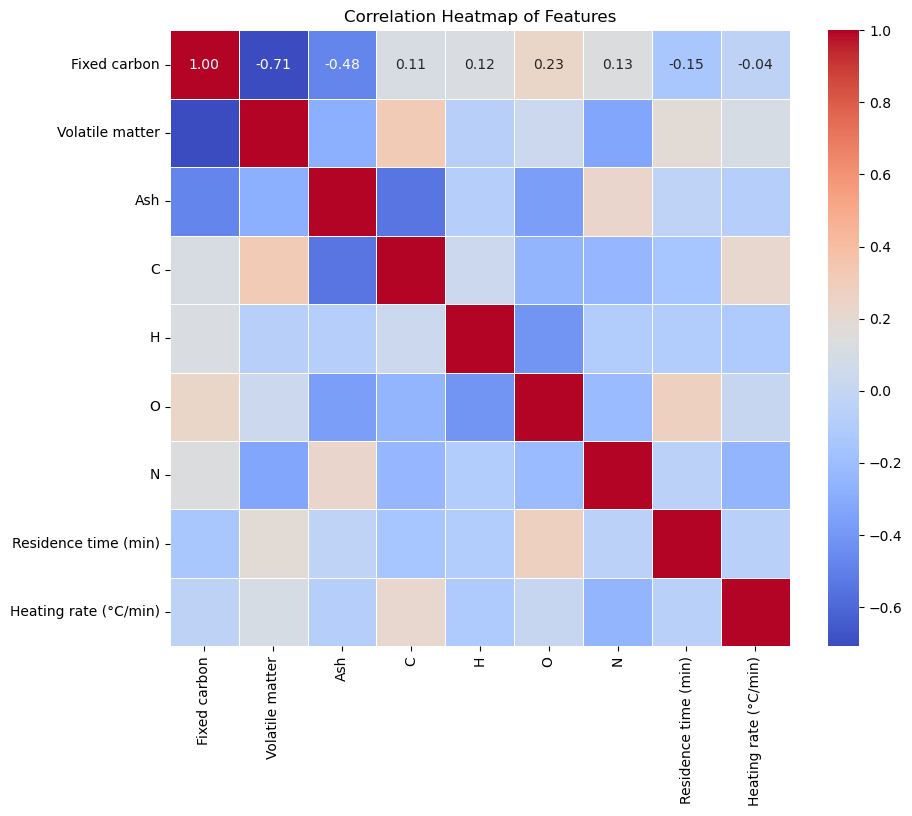

Mean Squared Error for Biochar Yield Classification Model: 0.20


In [54]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the CSV data file into a pandas DataFrame
file_path = r'C:\Users\keswa\OneDrive - Universiti Teknikal Malaysia Melaka\UTEM\BITU 3973 (FYP)\Data-Biochar-Yield.csv'
try:
    df = pd.read_csv(file_path, index_col='Unnamed: 0', encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, index_col='Unnamed: 0', encoding='iso-8859-1')

print(df.head())

# Visualisation of all the variables (WWTP) 
fig = px.box(df, y=df.drop(['Biochar yield (%)'], axis=1).columns, template='plotly_dark', title='Box Plots of all the variables')
fig.show()

# Define a function to convert continuous target variable to categorical for classification
def classify_target(y):
    return pd.qcut(y, q=3, labels=['Low', 'Medium', 'High'])

# Normalize the features
columns_to_drop = ['Biochar yield (%)', 'Temperature (°C)']
X = df.drop(columns_to_drop, axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.head())

# Apply the function to each target variable
y_bio_class = classify_target(df['Biochar yield (%)'])

# Split the dataset into training and testing subsets for Biochar Yield
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_bio_class, test_size=0.2, random_state=20)

# Random Forest Classifier model for Biochar Yield (%)
classifier_bio = RandomForestClassifier(random_state=20)
classifier_bio.fit(X_train, y_train)
y_pred_bio = classifier_bio.predict(X_test)

# Evaluate the model
accuracy_bio = accuracy_score(y_test, y_pred_bio)
classification_report_bio = classification_report(y_test, y_pred_bio)

print("Accuracy Biochar Yield (%)):", accuracy_bio)
print("\nClassification Report (Biochar Yield (%)):")
print(classification_report_bio)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(classification_report(y_test, y_pred_bio, output_dict=True)).T

# Plotting Precision, Recall, and F1-score for each class
plt.figure(figsize=(10, 6))
plt.plot(report_df.index[:-1], report_df['precision'][:-1], marker='o', label='Precision')
plt.plot(report_df.index[:-1], report_df['recall'][:-1], marker='o', label='Recall')
plt.plot(report_df.index[:-1], report_df['f1-score'][:-1], marker='o', label='F1-score')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Detailed Classification Report for Biochar Yield Classification Model')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Calculate feature importances
importances = classifier_bio.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_scaled_df.columns,
    'Importance': importances
})

# Sort the DataFrame by importance scores
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Classifier for Biochar Yield')
plt.show()

# Calculate the correlation matrix
correlation_matrix = X_scaled_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Predict probabilities for each class
y_prob_bio = classifier_bio.predict_proba(X_test)

# One-hot encode the true labels
encoder = OneHotEncoder()
y_test_encoded = encoder.fit_transform(y_test.values.reshape(-1, 1)).toarray()

# Calculate the MSE
mse_bio = mean_squared_error(y_test_encoded, y_prob_bio)
print("Mean Squared Error for Biochar Yield Classification Model: {:.2f}".format(mse_bio))
